In [213]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [51]:
df = pd.read_csv('./linear_regression_demo-master/challenge_dataset.txt', delim_whitespace=False,names=['X','Y'])
df.shape

(97, 2)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(df['X'], df['Y'], test_size=0.3)
reg1 = linear_model.LinearRegression()
reg1.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
#reg1.predict(X_test.values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
reg1.score(X_test.values.reshape(-1,1),y_test.values.reshape(-1,1))

0.60789782114298963

In [104]:
# Without splitting input data to train and test.
X = df1[['X']]
y = df1[['Y']]
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

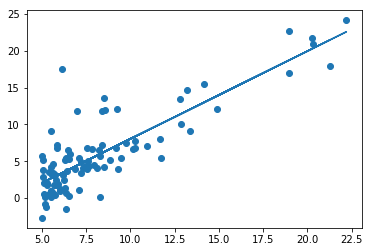

In [105]:
#Visualize results
plt.scatter(X, Y)
plt.plot(X, Y_predict)
plt.show()

In [76]:
reg.score(X_test.values.reshape(-1,1),y_test.values.reshape(-1,1),sample_weight=None)

0.95555186340870713

###Bonus

Linear regression on a dataset with 3 different variables

In [130]:
co2_df = pd.read_csv('./linear-regression-sklearn-master/global_co2.csv')

print(co2_df.tail())
print(temp_df.tail())

     Year  Total  Gas Fuel  Liquid Fuel  Solid Fuel  Cement  Gas Flaring  \
255  2006   8370      1525         3089        3339     356           61   
256  2007   8566      1572         3081        3464     382           68   
257  2008   8783      1631         3122        3571     388           71   
258  2009   8740      1585         3056        3620     413           66   
259  2010   9167      1702         3114        3842     450           59   

     Per Capita  
255        1.27  
256        1.28  
257        1.30  
258        1.28  
259        1.33  
      Source  Year    Mean
267  GISTEMP  1882 -0.1000
268     GCAG  1881 -0.0707
269  GISTEMP  1881 -0.1200
270     GCAG  1880 -0.1247
271  GISTEMP  1880 -0.2000


In [140]:
# Clean data
co2_df = co2_df.iloc[:,:2]                       # Keep only total CO2
co2_df = co2_df.loc[co2_df['Year'] >= 1960]      # Keep only 1960 - 2010
co2_df.columns=['Year','CO2']                    # Rename columns
co2_df = co2_df.reset_index(drop=True)           # Reset index

In [141]:
temp_df = pd.read_csv('./linear-regression-sklearn-master/annual_temp.csv')
temp_df = temp_df[temp_df['Source']!="GISTEMP"]
temp_df.drop('Source',inplace=True, axis=1)
temp_df = temp_df[(temp_df['Year']>=1960) | (temp_df['Year']<=2010)]
temp_df.columns = ['Year','Temperature']
temp_df = temp_df.reset_index(drop=True)

In [160]:
climate_change_df = pd.merge(co2_df,temp_df,how='inner')
climate_change_df = climate_change_df.astype('float32')

In [144]:
climate_change.head()

,Year,CO2,Temperature
0,1960,2569,0.0252
1,1961,2580,0.0818
2,1962,2686,0.0924
3,1963,2833,0.1100
4,1964,2995,-0.1461


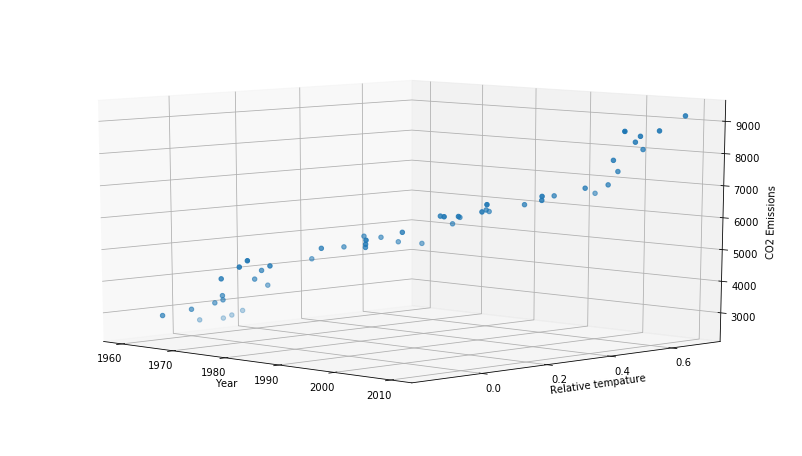

In [155]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Visualize data
fig = plt.figure()
fig.set_size_inches(14, 8)
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(xs=climate_change_df['Year'], ys=climate_change_df['Temperature'], zs=climate_change_df['CO2'])

ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.view_init(10, -45)

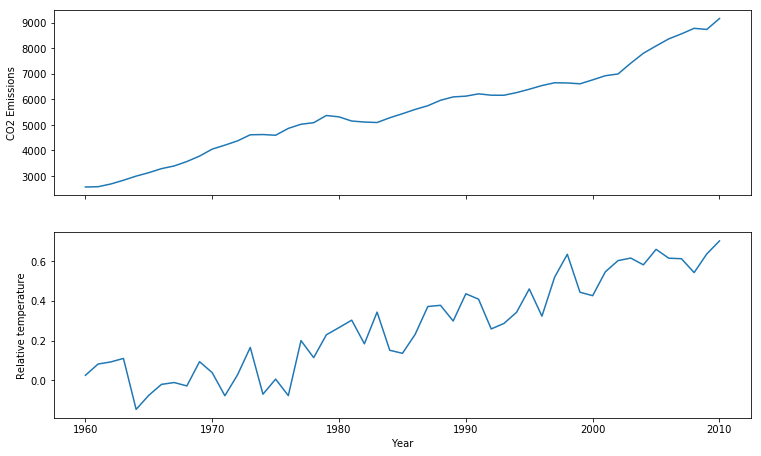

In [156]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')

In [217]:
X = climate_change_df[['Year']]
y = climate_change_df[['CO2','Temperature']]

In [218]:
# train model on data
linearmodel = linear_model.LinearRegression()
linearmodel.fit(X, y)

# The coefficients
print('Coefficients: ', linearmodel.coef_)
# Explained variance score: 1 is perfect prediction
print('\n Variance score: %.2f' % reg.score(X,y))
# The mean squared error
mse = metrics.mean_squared_error(linearmodel.predict(X),np.asarray(y.values))

('Coefficients: ', array([[  1.15107979e+02],
       [  1.49254026e-02]]))

 Variance score: 0.97


In [181]:
x_line = np.arange(1960,2011).reshape(-1,1)
q = reg.predict(x_line)
q.shape


(51, 2)

In [179]:
p = q.T
p.shape

(2, 51)

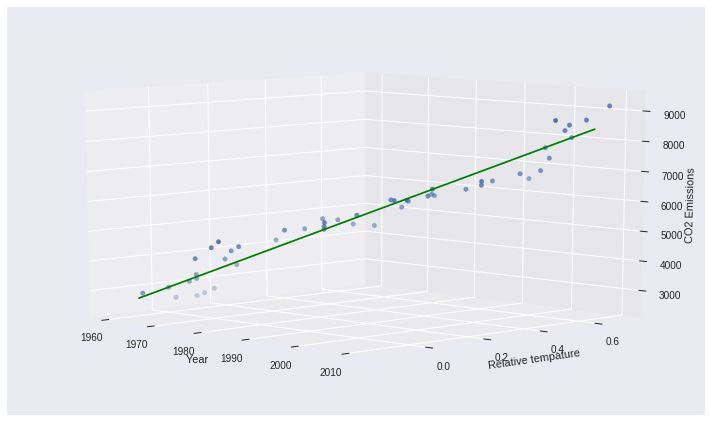

In [174]:
#Visualize Results

fig2 = plt.figure()
fig2.set_size_inches(12.5, 7.5)
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(xs=climate_change_df['Year'], ys=climate_change_df['Temperature'], zs=climate_change_df['CO2'])
ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.plot(xs=x_line, ys=p[1], zs=p[0], color='green')
ax.view_init(10, -45)